<a href="https://colab.research.google.com/github/yunju-m/DAP/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 지역별 범죄 발생의 현황
전국 경찰관서에 고소, 고발, 인지 등으로 형사입건된 사건의 발생, 검거, 피의자에 대한 지역별 분석 현황 [데이터](https://www.data.go.kr/data/3074462/fileData.do)

**[TODO]**
범죄대분류, 범죄중분류, 서울, 부산, 대구, 인천, 광주, 대전 울산, 세종, 경기도 지역으로 구분하여 발생 건수를 확인하고 가장 많은 범죄 발생률을 파악하고 그의 원인을 고찰하여 예방자세를 기른다. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load DataSet
데이터 불러오기, 기본 번호 지정x

In [180]:
data = pd.read_csv('https://raw.githubusercontent.com/yunju-m/DAP/main/Regional_crime_statistic.csv', encoding='cp949', index_col=0)
data

,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,경기 과천,경기 광명,경기 광주,경기 구리,경기 군포,경기 김포,경기 남양주,경기 동두천,경기 부천,경기 성남,경기 수원,경기 시흥,경기 안산,경기 안성,경기 안양,경기 양주,경기 여주,경기 오산,경기 용인,경기 의왕,경기 의정부,경기 이천,경기 파주,경기 평택,경기 포천,경기 하남,경기 화성,강원 강릉,강원 동해,강원 삼척,...,충남 논산,충남 당진,충남 보령,충남 서산,충남 아산,충남 천안,전북 군산,전북 김제,전북 남원,전북 익산,전북 전주,전북 정읍,전남 광양,전남 나주,전남 목포,전남 순천,전남 여수,경북 경산,경북 경주,경북 구미,경북 김천,경북 문경,경북 상주,경북 안동,경북 영주,경북 영천,경북 포항,경남 거제,경남 김해,경남 마산,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
범죄대분류,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강력범죄,살인기수,67,20,13,17,11,8,12,2,8,2,1,4,0,1,2,5,0,7,4,6,9,8,0,2,1,1,2,7,0,0,3,3,1,4,1,7,1,1,0,...,3,0,3,0,5,4,0,0,0,3,4,0,0,0,2,1,4,1,3,3,0,1,1,2,1,0,1,2,1,0,1,0,2,4,7,2,0,11,7,30
강력범죄,살인미수등,96,41,23,34,7,16,11,1,9,0,1,8,3,1,3,6,3,13,6,7,6,12,2,6,2,3,2,5,0,7,2,4,6,3,0,8,4,1,0,...,3,1,5,1,4,8,6,0,0,5,7,1,3,1,0,1,2,2,4,2,1,0,0,0,0,2,7,1,7,0,5,5,6,0,13,2,1,16,4,44
강력범죄,강도,274,161,60,103,44,64,29,0,14,0,4,4,6,5,7,12,0,25,30,38,14,42,2,7,5,5,4,11,1,15,8,5,20,3,1,12,8,0,0,...,4,3,3,6,2,22,7,1,2,14,21,0,1,0,9,9,6,14,9,13,3,1,1,0,9,5,10,4,17,0,1,4,2,13,26,3,4,29,4,65
강력범죄,강간,969,383,216,304,216,181,132,3,73,0,12,25,22,26,33,50,6,105,83,157,36,86,23,52,19,13,23,53,8,67,23,29,50,17,11,32,28,5,10,...,13,11,10,11,27,82,21,13,11,34,68,16,14,4,42,34,43,23,30,50,14,5,9,25,9,9,48,23,42,0,10,12,35,63,85,11,14,64,18,328
강력범죄,유사강간,118,24,21,35,17,14,10,1,9,0,0,3,1,2,5,2,0,12,12,21,5,2,0,4,1,0,2,9,0,10,3,3,6,1,1,4,5,1,0,...,1,0,4,7,2,6,2,0,1,3,4,1,1,1,1,5,2,2,2,6,1,2,1,2,1,0,4,2,1,0,1,1,3,1,8,1,1,12,0,33
강력범죄,강제추행,4282,991,645,924,495,362,293,34,256,20,77,49,73,67,75,132,36,291,319,425,171,242,42,180,44,17,81,209,30,157,59,89,161,47,25,133,56,32,12,...,39,32,26,48,64,177,62,17,21,59,176,24,19,5,81,72,51,54,55,81,25,12,13,36,23,14,90,62,114,1,20,22,59,58,172,36,32,165,28,764
강력범죄,기타강간강제추행등,94,37,20,31,22,12,9,0,7,0,2,2,3,0,2,9,0,7,14,23,6,6,3,4,3,2,2,7,0,6,4,2,4,3,0,2,1,1,3,...,0,1,1,2,2,10,4,3,0,2,6,1,2,1,3,3,1,1,3,4,2,1,1,4,4,0,8,1,7,0,1,2,1,4,13,3,1,11,2,55
강력범죄,방화,315,117,86,94,48,41,36,5,40,1,6,6,9,7,13,26,1,38,29,40,25,30,4,12,8,2,4,15,5,22,10,9,19,17,4,14,5,4,6,...,8,4,4,5,4,22,9,5,3,10,11,6,3,0,8,7,13,5,6,10,4,2,2,8,6,3,16,12,9,0,2,7,9,12,33,0,12,23,4,148
절도범죄,절도,55280,20136,12759,10679,8438,9495,5449,638,3287,170,1234,1072,1042,944,1082,1888,410,5048,3941,6487,1791,4154,844,2142,719,417,1164,2791,307,2304,655,1136,2160,580,575,2178,832,288,188,...,634,1325,681,769,1487,3945,1470,344,276,1391,3402,565,461,46,1520,1188,1049,1174,1297,2212,506,227,322,679,245,298,2496,1395,2739,2,313,358,1205,2032,5860,602,921,3309,643,11754


범죄대분류를 기준으로 같은 것끼리 그룹화하고 합을 나타냅니다.

In [181]:
data.groupby('범죄대분류').sum()

,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,경기 과천,경기 광명,경기 광주,경기 구리,경기 군포,경기 김포,경기 남양주,경기 동두천,경기 부천,경기 성남,경기 수원,경기 시흥,경기 안산,경기 안성,경기 안양,경기 양주,경기 여주,경기 오산,경기 용인,경기 의왕,경기 의정부,경기 이천,경기 파주,경기 평택,경기 포천,경기 하남,경기 화성,강원 강릉,강원 동해,강원 삼척,강원 속초,...,충남 논산,충남 당진,충남 보령,충남 서산,충남 아산,충남 천안,전북 군산,전북 김제,전북 남원,전북 익산,전북 전주,전북 정읍,전남 광양,전남 나주,전남 목포,전남 순천,전남 여수,경북 경산,경북 경주,경북 구미,경북 김천,경북 문경,경북 상주,경북 안동,경북 영주,경북 영천,경북 포항,경남 거제,경남 김해,경남 마산,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
범죄대분류,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강력범죄,6215,1774,1084,1542,860,698,532,46,416,23,103,101,117,109,140,242,46,498,497,717,272,428,76,267,83,43,120,316,44,284,112,144,267,95,43,212,108,45,31,34,...,71,52,56,80,110,331,111,39,38,130,297,49,43,12,146,132,122,102,112,169,50,24,28,77,53,33,184,107,198,1,41,53,117,155,357,58,65,331,67,1467
교통범죄,74958,35841,39725,31163,23412,13556,16600,1056,11926,720,2740,3660,2151,2121,3726,4795,954,10467,8900,14715,7830,11372,2490,5909,2547,1687,2009,7716,1722,3670,2653,6218,7646,2677,2583,5902,2737,1519,1110,1436,...,1182,1943,1703,1767,2296,9104,3497,997,752,3202,6444,1115,2434,276,4699,4954,5083,2464,4839,8505,2121,1005,1160,1750,1644,1346,7475,4832,8691,2,1216,2517,3759,3351,12650,2936,3581,10857,2325,43877
기타범죄,41752,19868,9766,13677,5301,4602,4881,462,3473,174,1138,1135,699,672,1205,2361,372,3804,3297,4856,1961,3293,939,1924,847,368,913,2304,305,1642,829,1355,2122,881,482,2058,899,397,739,333,...,505,1384,959,669,888,2693,1765,297,255,1142,2262,401,424,140,1471,811,2846,802,1239,1307,464,190,229,532,242,268,2130,957,2018,12,410,1040,978,933,3643,1594,1331,3130,1341,17797
노동범죄,215,190,31,28,13,14,63,0,13,0,6,13,2,4,4,6,0,21,9,28,5,26,3,34,5,1,1,5,0,5,0,5,29,2,1,15,15,0,0,5,...,3,2,1,2,0,11,5,0,3,1,34,2,2,0,18,16,6,6,3,13,6,0,1,6,3,0,15,14,14,0,0,1,10,0,19,43,3,6,1,45
마약범죄,1360,759,393,557,69,78,67,2,82,4,15,22,16,15,13,24,25,56,79,118,41,71,92,37,25,114,18,137,6,103,10,48,124,38,10,56,5,2,1,0,...,3,19,10,18,36,52,7,1,2,5,32,1,7,0,13,14,23,11,28,44,17,11,17,19,11,27,19,22,121,1,43,24,25,90,122,10,6,20,16,509
병역범죄,4591,959,800,1200,371,630,382,86,360,10,61,170,71,53,50,312,44,355,362,433,228,332,101,201,137,19,104,235,34,188,71,142,156,105,36,225,33,23,9,8,...,72,49,20,36,99,414,82,12,19,55,186,27,38,1,98,91,82,82,76,214,37,5,32,38,14,31,243,112,198,1,57,42,158,92,355,52,52,190,155,808
보건범죄,3941,1832,417,654,760,204,230,15,223,6,90,87,62,45,68,261,20,162,244,368,302,134,51,88,77,22,32,170,19,86,41,102,94,50,41,186,37,23,7,34,...,21,26,33,20,57,63,97,18,26,88,144,37,15,9,42,24,78,34,53,118,25,8,17,18,11,21,100,71,126,1,51,29,57,123,258,19,37,131,36,843
선거범죄,24,24,18,19,9,8,15,5,4,1,3,0,2,0,3,0,0,0,2,2,3,1,7,3,1,8,0,8,1,0,9,11,8,0,0,6,7,1,4,1,...,5,7,10,3,4,1,0,10,6,2,9,7,5,6,6,5,7,4,9,9,11,3,17,2,0,3,5,3,4,0,4,5,3,30,17,4,12,11,3,267
안보범죄,38,4,4,20,3,4,2,0,1,0,1,0,0,0,0,0,0,2,2,3,0,2,0,2,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,11,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,6


데이터의 행부분의 내용을 확인하고 전국 16개의 시도로 분류한 후 각각에 대하여 범죄 발생률을 파악합니다.

#**1. 경기도**

In [182]:
data.columns

Index(['범죄중분류', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기 고양',
       '경기 과천', '경기 광명', '경기 광주', '경기 구리', '경기 군포', '경기 김포', '경기 남양주',
       '경기 동두천', '경기 부천', '경기 성남', '경기 수원', '경기 시흥', '경기 안산', '경기 안성', '경기 안양',
       '경기 양주', '경기 여주', '경기 오산', '경기 용인', '경기 의왕', '경기 의정부', '경기 이천', '경기 파주',
       '경기 평택', '경기 포천', '경기 하남', '경기 화성', '강원 강릉', '강원 동해', '강원 삼척', '강원 속초',
       '강원 원주', '강원 춘천', '강원 태백', '충북 제천', '충북 청주', '충북 충주', '충남 계룡', '충남 공주',
       '충남 논산', '충남 당진', '충남 보령', '충남 서산', '충남 아산', '충남 천안', '전북 군산', '전북 김제',
       '전북 남원', '전북 익산', '전북 전주', '전북 정읍', '전남 광양', '전남 나주', '전남 목포', '전남 순천',
       '전남 여수', '경북 경산', '경북 경주', '경북 구미', '경북 김천', '경북 문경', '경북 상주', '경북 안동',
       '경북 영주', '경북 영천', '경북 포항', '경남 거제', '경남 김해', '경남 마산', '경남 밀양', '경남 사천',
       '경남 양산', '경남 진주', '경남 창원', '경남 통영', '제주 서귀포', '제주 제주', '기타도시', '도시이외'],
      dtype='object')

In [183]:
Gyeonggido = data.loc[:,['경기 고양', '경기 과천', '경기 광명', '경기 광주','경기 구리', '경기 군포', '경기 김포', '경기 남양주', '경기 동두천',
       '경기 부천', '경기 성남', '경기 수원', '경기 시흥', '경기 안산', '경기 안성', '경기 안양', '경기 양주',
       '경기 여주', '경기 오산', '경기 용인', '경기 의왕', '경기 의정부', '경기 이천', '경기 파주', '경기 평택',
       '경기 포천', '경기 하남', '경기 화성']]

In [184]:
Gyeonggido = Gyeonggido.groupby('범죄대분류').sum()
Gyeonggido

,경기 고양,경기 과천,경기 광명,경기 광주,경기 구리,경기 군포,경기 김포,경기 남양주,경기 동두천,경기 부천,경기 성남,경기 수원,경기 시흥,경기 안산,경기 안성,경기 안양,경기 양주,경기 여주,경기 오산,경기 용인,경기 의왕,경기 의정부,경기 이천,경기 파주,경기 평택,경기 포천,경기 하남,경기 화성
범죄대분류,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강력범죄,416,23,103,101,117,109,140,242,46,498,497,717,272,428,76,267,83,43,120,316,44,284,112,144,267,95,43,212
교통범죄,11926,720,2740,3660,2151,2121,3726,4795,954,10467,8900,14715,7830,11372,2490,5909,2547,1687,2009,7716,1722,3670,2653,6218,7646,2677,2583,5902
기타범죄,3473,174,1138,1135,699,672,1205,2361,372,3804,3297,4856,1961,3293,939,1924,847,368,913,2304,305,1642,829,1355,2122,881,482,2058
노동범죄,13,0,6,13,2,4,4,6,0,21,9,28,5,26,3,34,5,1,1,5,0,5,0,5,29,2,1,15
마약범죄,82,4,15,22,16,15,13,24,25,56,79,118,41,71,92,37,25,114,18,137,6,103,10,48,124,38,10,56
병역범죄,360,10,61,170,71,53,50,312,44,355,362,433,228,332,101,201,137,19,104,235,34,188,71,142,156,105,36,225
보건범죄,223,6,90,87,62,45,68,261,20,162,244,368,302,134,51,88,77,22,32,170,19,86,41,102,94,50,41,186
선거범죄,4,1,3,0,2,0,3,0,0,0,2,2,3,1,7,3,1,8,0,8,1,0,9,11,8,0,0,6
안보범죄,1,0,1,0,0,0,0,0,0,2,2,3,0,2,0,2,0,0,0,2,0,0,0,0,0,1,0,0


In [112]:
violent= Gyeonggido.loc['강력범죄'].sum()
traffic= Gyeonggido.loc['교통범죄'].sum()
other= Gyeonggido.loc['기타범죄'].sum()
labor= Gyeonggido.loc['노동범죄'].sum()
drug= Gyeonggido.loc['마약범죄'].sum()
militaryService= Gyeonggido.loc['병역범죄'].sum()
health= Gyeonggido.loc['보건범죄'].sum()
election= Gyeonggido.loc['선거범죄'].sum()
security= Gyeonggido.loc['안보범죄'].sum()
theft= Gyeonggido.loc['절도범죄'].sum()
intelligent= Gyeonggido.loc['지능범죄'].sum()
specialEconomic= Gyeonggido.loc['특별경제범죄'].sum()
violent= Gyeonggido.loc['폭력범죄'].sum()
customs= Gyeonggido.loc['풍속범죄'].sum()
environmental= Gyeonggido.loc['환경범죄'].sum()

각 지역의 범죄 발생율을 합하여 경기도 dataframe생성

In [115]:
from pandas.core.frame import DataFrame
date = ['강력범죄', '교통범죄', '기타범죄', '노동범죄', '마약범죄', '병역범죄', '보건범죄', '선거범죄', '안보범죄', '절도범죄', '지능범죄', '특별경제범죄', '폭력범죄', '풍속범죄', '환경범죄']
case = {'경기도' : [violent, traffic, other, labor, drug, militaryService, health, election, security, theft, intelligent, specialEconomic, violent, customs, environmental]}
gyeonggi = DataFrame(case, columns=['경기도'], index = date)
gyeonggi

,경기도
강력범죄,71930
교통범죄,141506
기타범죄,45409
노동범죄,243
마약범죄,1399
병역범죄,4595
보건범죄,3131
선거범죄,83
안보범죄,16
절도범죄,50522


경기도 범죄별 발생률을 그래프로 나타낸다.

reference 참조: [kaggle.com](https://www.kaggle.com/mig555/mushroom-classification)

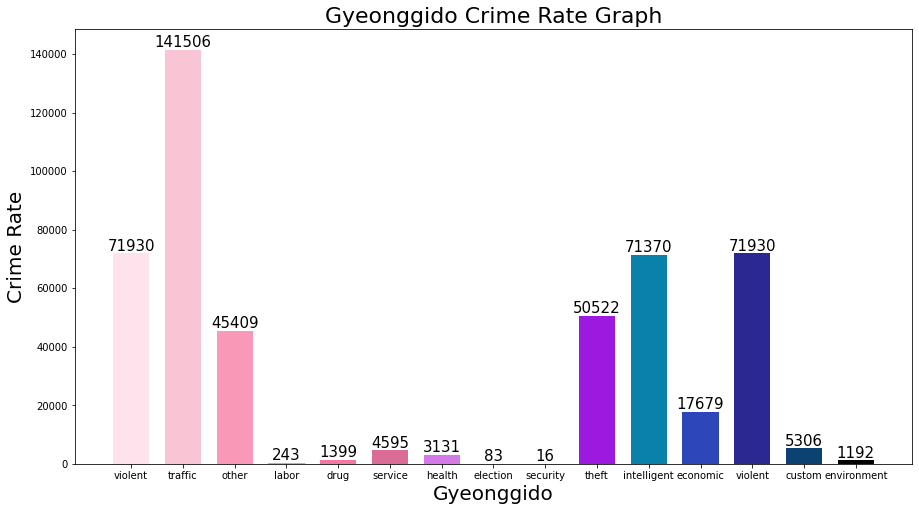

In [208]:
#Obtain total number of mushrooms for each 'cap-color' (Entire DataFrame)
crime = gyeonggi['경기도']
m_height = crime.values.tolist()
crime.axes
cap_color_labels = crime.axes[0].tolist()

#=====PLOT Preparations and Plotting====#
ind = np.arange(15) 
width = 0.7  
colors = ['#FEE3EC','#F9C5D5', '#F999B7', '#FF87CA', '#F2789F', '#DB6B97', '#D47AE8', '#B983FF', '#AE4CCF', '#9C19E0','#0A81AB', '#2D46B9', '#2C2891', '#0C4271', '#000000']
fig, ax = plt.subplots(figsize=(15,8))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Gyeonggido",fontsize=20)
ax.set_ylabel('Crime Rate',fontsize=20)
ax.set_title('Gyeonggido Crime Rate Graph',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('violent', 'traffic', 'other', 'labor', 'drug', 'service', 'health', 'election', 'security', 'theft', 'intelligent', 'economic', 'violent', 'custom', 'environment'),
                  fontsize = 10)

def autolabel(rects,fontsize=15):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show()

경기도에서는 교통범죄가 제일 많이 발생하고 강력범죄와 폭력범죄가 두 번째로 많이 발생한 것을 알 수 있다.

#**2. 강원도**